In [363]:
import pandas as pd
import numpy as np

In [364]:
ex='hello'

In [365]:
list(ex)

['h', 'e', 'l', 'l', 'o']

In [366]:
list(bytes(ex, 'ascii'))

[104, 101, 108, 108, 111]

In [367]:
train=pd.read_csv('train.csv')

In [368]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [369]:
train.shape

(19579, 3)

In [370]:
id=train[['id']]

In [371]:
X=train[['text']]

In [372]:
y=train[['author']]

In [373]:
del train

In [374]:
def convert_sent_to_ascii( sentence ):
    codes=list(bytes(sentence, 'ascii'))
    return codes

In [375]:
X['codes'] = X['text'].apply(lambda sentence: [ord(char) for char in sentence])

In [376]:
lens=[]
for i in range(X.shape[0]):
    lens.append(len(X['codes'][i]))
print(max(lens))

4663


In [377]:
mask=np.zeros((X.shape[0],max(lens)))

In [378]:
for row in range(X.shape[0]):
    elem=X['codes'][row]
    for col in range(len(elem)) :
        mask[row,col]=elem[col]

In [379]:
mask


array([[ 84., 104., 105., ...,   0.,   0.,   0.],
       [ 73., 116.,  32., ...,   0.,   0.,   0.],
       [ 73., 110.,  32., ...,   0.,   0.,   0.],
       ...,
       [ 77.,  97., 105., ...,   0.,   0.,   0.],
       [ 70., 111., 114., ...,   0.,   0.,   0.],
       [ 72., 101.,  32., ...,   0.,   0.,   0.]])

In [380]:
cols=['feat'+str(i) for i in range(mask.shape[1])]

In [381]:
tr=pd.DataFrame(mask,columns=cols)

In [382]:
np.unique(tr['feat0'],return_counts=True)

(array([ 34.,  39.,  44.,  46.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
         83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  97.,  98.,  99.,
        100., 101., 102., 103., 104., 105., 108., 109., 110., 111., 112.,
        115., 116., 118., 119., 121.]),
 array([1187,   36,    1,    2, 1879,  906,  196,  262,  212,  437,  103,
        1538, 3864,   47,   22,  213,  594,  418,  640,  227,   11,  123,
         864, 3896,  126,   37, 1250,    3,  364,    6,   18,    5,    3,
           8,    3,    5,    3,   10,    4,    3,    2,    3,    4,    3,
           6,   17,    1,   12,    5], dtype=int64))

In [383]:
np.corrcoef(tr['feat1'],tr['feat3'])

array([[ 1.        , -0.19125922],
       [-0.19125922,  1.        ]])

In [384]:
tr = tr.iloc[:,:1000]
tr

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat990,feat991,feat992,feat993,feat994,feat995,feat996,feat997,feat998,feat999
0,84.0,104.0,105.0,115.0,32.0,112.0,114.0,111.0,99.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73.0,116.0,32.0,110.0,101.0,118.0,101.0,114.0,32.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73.0,110.0,32.0,104.0,105.0,115.0,32.0,108.0,101.0,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,72.0,111.0,119.0,32.0,108.0,111.0,118.0,101.0,108.0,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,70.0,105.0,110.0,100.0,105.0,110.0,103.0,32.0,110.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19574,73.0,32.0,99.0,111.0,117.0,108.0,100.0,32.0,104.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19575,84.0,104.0,101.0,32.0,108.0,105.0,100.0,115.0,32.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19576,77.0,97.0,105.0,115.0,32.0,105.0,108.0,32.0,102.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19577,70.0,111.0,114.0,32.0,97.0,110.0,32.0,105.0,116.0,101.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
g=list(tr['feat309'])
c=list(tr['feat394'])
print('g ',g[:100])
print('c ',c[:100])

g  [0.0, 0.0, 0.0, 0.0, 0.0, 116.0, 0.0, 0.0, 104.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 102.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 119.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 104.0, 111.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 97.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
c  [0.0, 0.0, 0.0, 0.0, 0.0, 44.0, 0.0, 0.0, 32.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44.0, 0.0, 0.0, 111.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [389]:
np.unique(g,return_counts=True)

(array([  0.,  32.,  34.,  44.,  46.,  59.,  65.,  68.,  72.,  80.,  83.,
         84.,  87.,  89.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
        105., 106., 107., 108., 109., 110., 111., 112., 114., 115., 116.,
        117., 118., 119., 120., 121., 122.]),
 array([18426,   193,     3,    16,     7,     1,     1,     1,     1,
            1,     1,     1,     1,     1,    53,    15,    27,    41,
          131,    25,    19,    50,    65,     1,     5,    34,    32,
           64,    75,    16,    44,    64,    83,    31,    15,    21,
            2,    11,     1], dtype=int64))

In [390]:
np.unique(c,return_counts=True)

(array([  0.,  32.,  34.,  39.,  44.,  46.,  63.,  65.,  68.,  71.,  84.,
         97.,  98.,  99., 100., 101., 102., 103., 104., 105., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 121.]),
 array([19102,    64,     1,     1,    11,     7,     1,     2,     1,
            1,     1,    26,     6,    14,    18,    50,    19,     6,
           32,    22,    21,    12,    33,    34,     6,     1,    14,
           21,    31,     6,     6,     8,     1], dtype=int64))

In [391]:
translate=[]
for  i in range(len(g)):
    if c!=32.:
        translate.append(g[i])
    else:
        translate.append(c[i])

In [392]:
len(translate)

19579

In [394]:
len(g)

19579

In [395]:
tr['translate']=translate

In [396]:
from sklearn.model_selection import train_test_split

In [397]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

C:\Users\AlexandruDaia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [398]:
X_train, X_test, y_train, y_test = train_test_split(tr, y, test_size=0.25, random_state=42)

In [399]:
import xgboost as xgb
model=xgb.XGBClassifier(n_estimators=11)

model.fit(X_train,y_train)
pred=model.predict(X_test)
from sklearn.metrics import classification_report,accuracy_score
target_names = ['author 0', 'author 1', 'author 2']
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

    author 0       0.48      0.66      0.55      1937
    author 1       0.43      0.36      0.39      1379
    author 2       0.47      0.31      0.37      1579

    accuracy                           0.46      4895
   macro avg       0.46      0.44      0.44      4895
weighted avg       0.46      0.46      0.45      4895



In [400]:
from sklearn.metrics import log_loss

In [401]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([1937, 1379, 1579], dtype=int64))

In [402]:
np.unique(pred,return_counts=True)

(array([0, 1, 2], dtype=int64), array([2688, 1175, 1032], dtype=int64))

In [403]:
pred_prob=model.predict_proba(X_test)
pred_prob

array([[0.3918783 , 0.34705588, 0.26106587],
       [0.41499567, 0.18319958, 0.40180475],
       [0.43163684, 0.205706  , 0.36265716],
       ...,
       [0.31223944, 0.45415992, 0.2336007 ],
       [0.38529575, 0.3637634 , 0.25094086],
       [0.3142424 , 0.28471592, 0.4010417 ]], dtype=float32)

In [404]:
y_test

array([0, 2, 2, ..., 2, 0, 2])

In [405]:
print(log_loss(y_test,pred_prob))

1.0373445143178814


In [406]:
pwd

'C:\\Users\\AlexandruDaia\\Downloads\\spook\\train'

In [407]:
test=pd.read_csv('C:\\Users\\AlexandruDaia\\Downloads\\spook\\test\\test.csv')

In [408]:
id=test[['id']]

In [409]:
X=test[['text']]
X

,text
0,"Still, as I urged our leaving Ireland with suc..."
1,"If a fire wanted fanning, it could readily be ..."
2,And when they had broken down the frail door t...
3,While I was thinking how I should possibly man...
4,I am not sure to what limit his knowledge may ...
...,...
8387,All this is now the fitter for my purpose.
8388,I fixed myself on a wide solitude.
8389,It is easily understood that what might improv...
8390,"Be this as it may, I now began to feel the ins..."


In [410]:
X['codes'] = X['text'].apply(lambda sentence: [ord(char) for char in sentence])

In [411]:
lens=[]
for i in range(X.shape[0]):
    lens.append(len(X['codes'][i]))
print(max(lens))

4437


In [412]:
mask=np.zeros((X.shape[0],max(lens)))

In [413]:
for row in range(X.shape[0]):
    elem=X['codes'][row]
    for col in range(len(elem)) :
        mask[row,col]=elem[col]

In [414]:
cols=['feat'+str(i) for i in range(mask.shape[1])]

In [415]:
tr=pd.DataFrame(mask,columns=cols)

In [416]:
tr = tr.iloc[:,:1000]
tr

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,...,feat990,feat991,feat992,feat993,feat994,feat995,feat996,feat997,feat998,feat999
0,83.0,116.0,105.0,108.0,108.0,44.0,32.0,97.0,115.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73.0,102.0,32.0,97.0,32.0,102.0,105.0,114.0,101.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,65.0,110.0,100.0,32.0,119.0,104.0,101.0,110.0,32.0,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87.0,104.0,105.0,108.0,101.0,32.0,73.0,32.0,119.0,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,73.0,32.0,97.0,109.0,32.0,110.0,111.0,116.0,32.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,65.0,108.0,108.0,32.0,116.0,104.0,105.0,115.0,32.0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8388,73.0,32.0,102.0,105.0,120.0,101.0,100.0,32.0,109.0,121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8389,73.0,116.0,32.0,105.0,115.0,32.0,101.0,97.0,115.0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8390,66.0,101.0,32.0,116.0,104.0,105.0,115.0,32.0,97.0,115.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [417]:
g=list(tr['feat309'])
c=list(tr['feat394'])
print('g ',g[:100])
print('c ',c[:100])

g  [0.0, 115.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 121.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 119.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
c  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 111.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [418]:
np.unique(g,return_counts=True)

(array([  0.,  32.,  39.,  44.,  46.,  65.,  67.,  76.,  78.,  84.,  97.,
         98.,  99., 100., 101., 102., 103., 104., 105., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 121.]),
 array([7899,   65,    1,    9,   11,    1,    1,    1,    1,    1,   37,
           6,   10,   13,   41,    8,   11,   23,   26,    2,   27,    9,
          15,   38,    9,    1,   25,   30,   36,   14,    8,    6,    7],
       dtype=int64))

In [419]:
translate=[]
for  i in range(len(g)):
    if c!=32.:
        translate.append(g[i])
    else:
        translate.append(c[i])

In [420]:
tr['translate']=translate

In [421]:
pred_ts=model.predict_proba(tr)

In [422]:
sub=pd.read_csv('C:\\Users\\AlexandruDaia\\Downloads\\spook\\sample_submission\\sample_submission.csv')

In [423]:
sub.head(3)

,id,EAP,HPL,MWS
0,id02310,0.403494,0.287808,0.308698
1,id24541,0.403494,0.287808,0.308698
2,id00134,0.403494,0.287808,0.308698


In [424]:
out_df = pd.DataFrame(pred_ts)
out_df.columns = ['EAP', 'HPL', 'MWS']
out_df.insert(0, 'id', test['id'])
out_df.to_csv("sub_fe4.csv", index=False)

In [362]:
out_df

,id,EAP,HPL,MWS
0,id02310,0.245494,0.524806,0.229699
1,id24541,0.481641,0.164996,0.353363
2,id00134,0.353342,0.340557,0.306101
3,id27757,0.251195,0.441801,0.307004
4,id04081,0.502774,0.127727,0.369499
...,...,...,...,...
8387,id11749,0.624568,0.114846,0.260586
8388,id10526,0.618162,0.099727,0.282111
8389,id13477,0.424207,0.226427,0.349366
8390,id13761,0.184045,0.411784,0.404171


In [425]:
a=pd.read_csv('sub_fe.csv')

In [429]:
b=out_df

In [430]:
c=a

In [431]:
c['EAP']=(a['EAP']+b['EAP'])/2

In [432]:
c['HPL']=(a['HPL']+b['HPL'])/2

In [433]:
c['MWS']=(a['MWS']+b['MWS'])/2

In [434]:
c.to_csv('avg.csv',index=False)

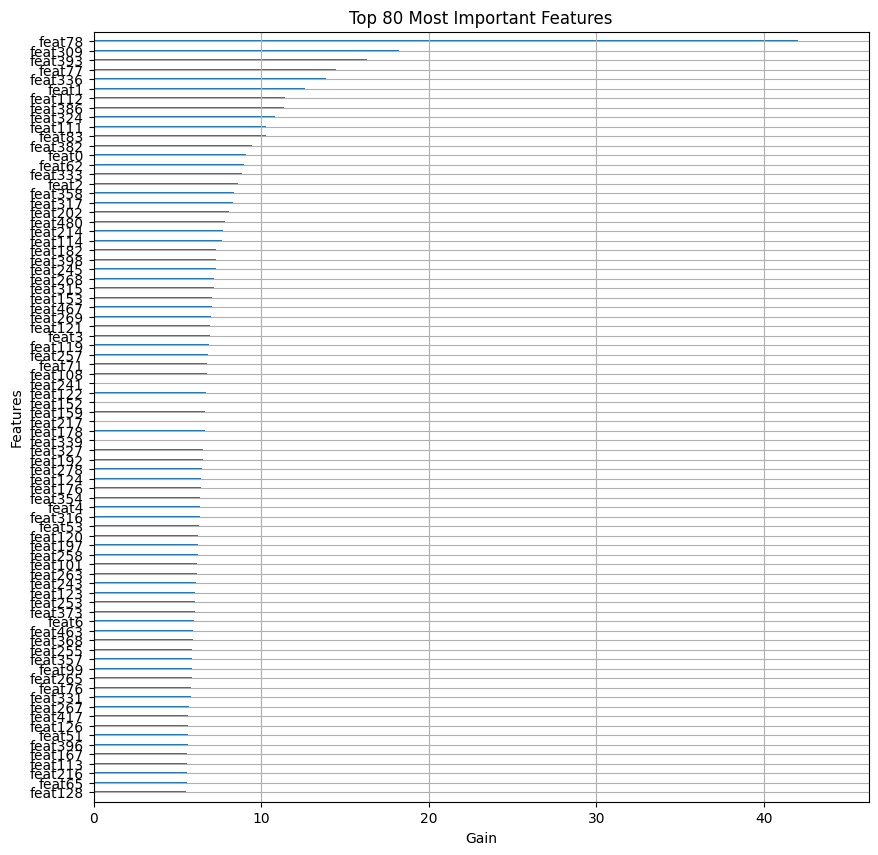

In [428]:
# Set the number of top features to plot
top_n = 80
import matplotlib
from matplotlib import pyplot as plt
# Plot feature importance with feature names
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(model, ax=ax, importance_type='gain',
                    max_num_features=top_n, show_values=False)
plt.yticks(range(top_n))
plt.xlabel('Gain')
plt.title(f'Top {top_n} Most Important Features')
plt.show()

In [251]:
np.corrcoef(tr['feat309'],tr['feat394'])

array([[1.        , 0.55095637],
       [0.55095637, 1.        ]])

In [80]:
row=tr.iloc[0]
np.sum((np.unique(row,return_counts=True)[1]/len(row))**2)

0.4347266662897846

In [81]:
def kinetic(row):
    return np.sum((np.unique(row,return_counts=True)[1]/len(row))**2)

In [82]:
tr['all_kinetc']=tr.apply(lambda x: kinetic(x),axis=1)

In [83]:
row

feat0       84.0
feat1      104.0
feat2      105.0
feat3      115.0
feat4       32.0
           ...  
feat660      0.0
feat661      0.0
feat662      0.0
feat663      0.0
feat664      0.0
Name: 0, Length: 665, dtype: float64

In [84]:
fibs=[]
for i in range(tr.shape[0]):
    fib_sum=[-1]*(tr.shape[1])
    row=tr.iloc[i]
    fib_sum[0]=row[0] 
    for j in range(1,len(row)):
            temp=(row[j]+row[j-1])
            fib_sum[j]=fib_sum[j-1]+temp
    fibs.append(fib_sum[len(fib_sum)-1])

In [85]:
tr['fib_sum']=fibs

In [86]:
np.unique(X['codes'][13],return_counts=True)

(array([ 32,  44,  46,  83,  84,  87,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118,
        120, 121]),
 array([14,  1,  1,  1,  1,  1,  4,  1,  1,  4, 12,  1,  1,  4,  2,  2,  5,
         2,  3,  4,  2,  4,  2,  7,  2,  1,  1,  2], dtype=int64))

In [87]:
np.unique(X['codes'][0],return_counts=True)

(array([ 32,  44,  46,  59,  73,  84,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118,
        119, 121]),
 array([40,  4,  1,  2,  2,  1, 11,  1,  7,  6, 25,  8,  4,  9, 13,  1,  3,
         8, 14, 15,  3, 10, 12, 17,  6,  1,  5,  2], dtype=int64))

In [88]:
X['text'][13]

'The farm like grounds extended back very deeply up the hill, almost to Wheaton Street.'

In [89]:
np.unique(convert_sent_to_ascii( X['text'][13])   ,return_counts=True)

(array([ 32,  44,  46,  83,  84,  87,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118,
        120, 121]),
 array([14,  1,  1,  1,  1,  1,  4,  1,  1,  4, 12,  1,  1,  4,  2,  2,  5,
         2,  3,  4,  2,  4,  2,  7,  2,  1,  1,  2], dtype=int64))

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [92]:
y

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(tr, y, test_size=0.33, random_state=42)

In [94]:
import xgboost as xgb

In [95]:
model=xgb.XGBClassifier(n_estimators=11)

In [96]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=11, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [97]:
pred=model.predict(X_test)

In [98]:
from sklearn.metrics import classification_report,accuracy_score

In [99]:
target_names = ['author 0', 'author 1', 'author 2']

In [100]:
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

    author 0       0.48      0.65      0.55      2587
    author 1       0.44      0.38      0.41      1852
    author 2       0.44      0.29      0.35      2023

    accuracy                           0.46      6462
   macro avg       0.45      0.44      0.44      6462
weighted avg       0.45      0.46      0.45      6462



In [101]:
from xgboost import XGBClassifier, plot_importance

In [102]:
model.predict_proba(X_test)

array([[0.3721257 , 0.3407444 , 0.2871299 ],
       [0.48064077, 0.1729283 , 0.3464309 ],
       [0.40738958, 0.25005648, 0.3425539 ],
       ...,
       [0.40433362, 0.1595097 , 0.4361567 ],
       [0.31891373, 0.1604618 , 0.52062446],
       [0.38038918, 0.19292407, 0.42668676]], dtype=float32)

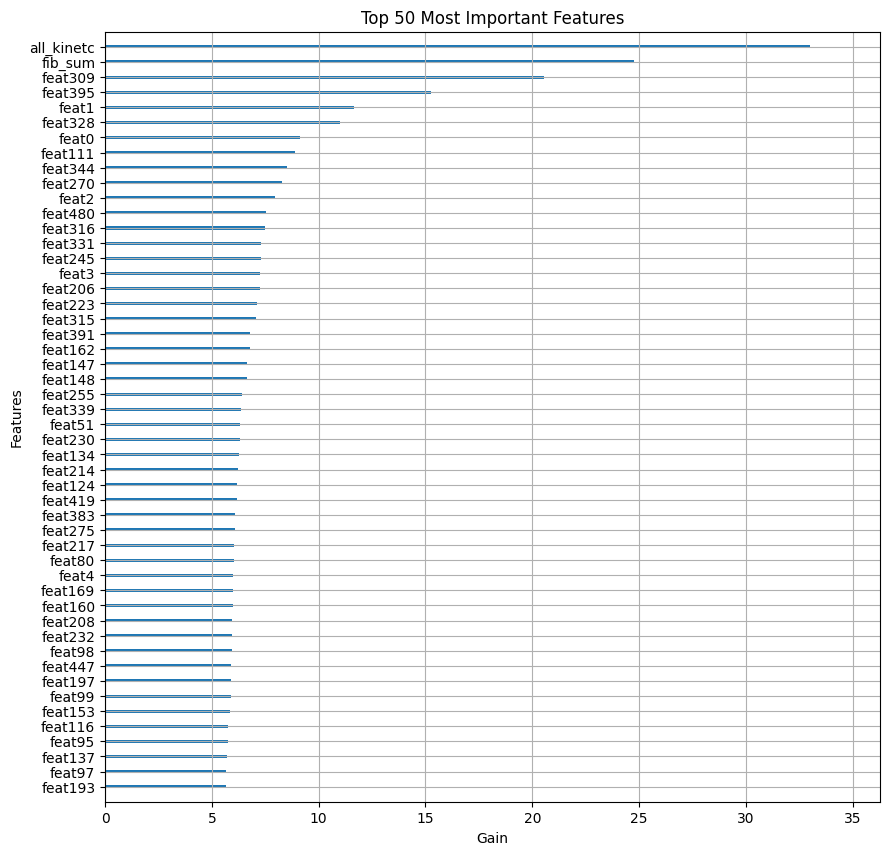

In [103]:
# Set the number of top features to plot
top_n = 50
import matplotlib
from matplotlib import pyplot as plt
# Plot feature importance with feature names
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(model, ax=ax, importance_type='gain',
                    max_num_features=top_n, show_values=False)
plt.yticks(range(top_n))
plt.xlabel('Gain')
plt.title(f'Top {top_n} Most Important Features')
plt.show()

In [104]:
np.corrcoef(mask)

array([[1.        , 0.51136815, 0.82667825, ..., 0.4888806 , 0.50373909,
        0.60777694],
       [0.51136815, 1.        , 0.51577497, ..., 0.89433556, 0.86834359,
        0.73308814],
       [0.82667825, 0.51577497, 1.        , ..., 0.48875214, 0.51593961,
        0.63801407],
       ...,
       [0.4888806 , 0.89433556, 0.48875214, ..., 1.        , 0.8492411 ,
        0.72194808],
       [0.50373909, 0.86834359, 0.51593961, ..., 0.8492411 , 1.        ,
        0.7019271 ],
       [0.60777694, 0.73308814, 0.63801407, ..., 0.72194808, 0.7019271 ,
        1.        ]])

In [105]:
top1f=tr['feat309']

In [106]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
comps=pca.fit_transform(tr)

In [107]:
tr['pca1']=comps[:,0]
tr['pca2']=comps[:,1]

In [108]:
 def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

In [109]:
tr['sum_of_digits'] = tr.apply(lambda x:sum_of_two_digits(x.feat309, x.pca2), axis=1)

In [110]:
tr['sum_of_digits_2'] = tr.apply(lambda x:sum_of_two_digits(x.feat70, x.pca2), axis=1)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(tr, y, test_size=0.33, random_state=42)
model=xgb.XGBClassifier(n_estimators=11)
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(classification_report(y_test, pred, target_names=target_names))
    

              precision    recall  f1-score   support

    author 0       0.48      0.66      0.56      2587
    author 1       0.44      0.37      0.40      1852
    author 2       0.44      0.30      0.35      2023

    accuracy                           0.46      6462
   macro avg       0.45      0.44      0.44      6462
weighted avg       0.46      0.46      0.45      6462



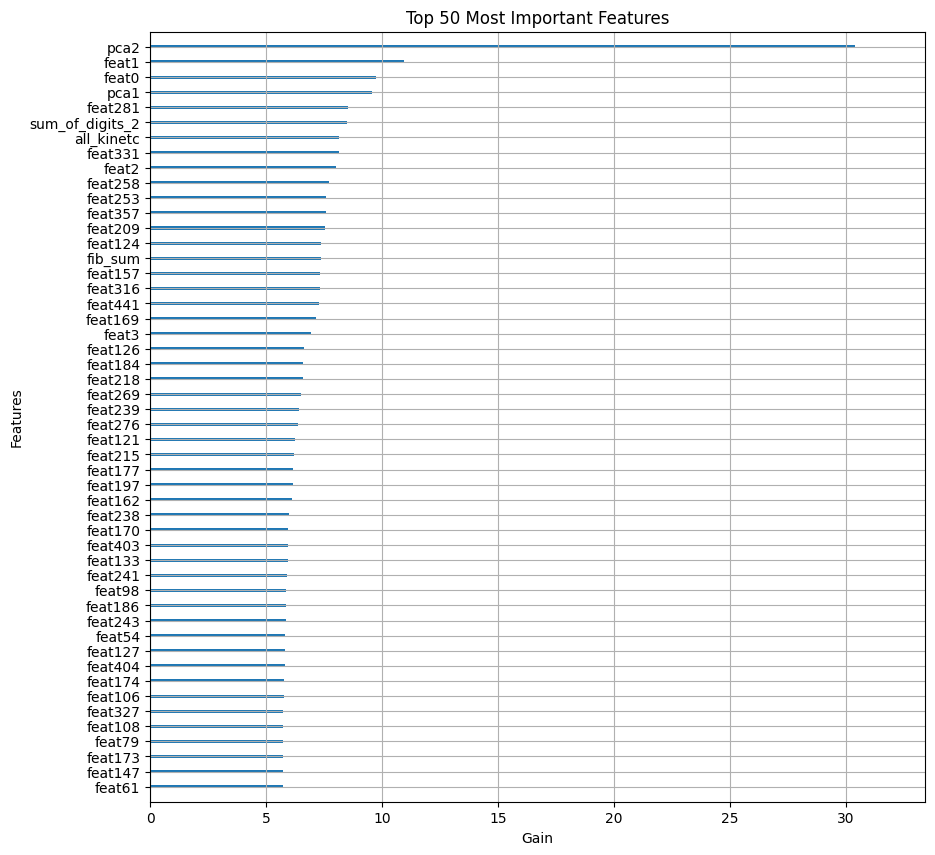

In [112]:
# Set the number of top features to plot
top_n = 50

# Plot feature importance with feature names
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(model, ax=ax, importance_type='gain',
                    max_num_features=top_n, show_values=False)
plt.yticks(range(top_n))
plt.xlabel('Gain')
plt.title(f'Top {top_n} Most Important Features')
plt.show()

In [113]:
def bubble_sort(numbers):
    n = len(numbers)
    # Traverse through all elements in the list
    for i in range(n):
        # Last i elements are already sorted
        for j in range(0, n-i-1):
            # Swap if the element found is greater than the next element
            if numbers[j] > numbers[j+1]:
                numbers[j], numbers[j+1] = numbers[j+1], numbers[j]
        

In [114]:
numbers=[3,2,1,7]

In [115]:
import numpy as np

def max_bubble_sort(numbers):
    sorted_=np.sort(numbers)
  
    max_=sorted_[0]*sorted_[1] 
    return max_

In [116]:
tr['max'] = tr.apply(lambda x: max_bubble_sort(x),axis=1)


In [117]:
tr['max']

0         34631.882833
1            -0.000000
2         99430.245145
3         98880.903996
4        135783.011398
             ...      
19574    266798.377866
19575        -0.000000
19576        -0.000000
19577        -0.000000
19578    324658.885147
Name: max, Length: 19579, dtype: float64

In [118]:
X_train, X_test, y_train, y_test = train_test_split(tr, y, test_size=0.33, random_state=42)
model=xgb.XGBClassifier(n_estimators=11)
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(classification_report(y_test, pred, target_names=target_names))
    

              precision    recall  f1-score   support

    author 0       0.48      0.65      0.55      2587
    author 1       0.44      0.36      0.40      1852
    author 2       0.44      0.30      0.35      2023

    accuracy                           0.46      6462
   macro avg       0.45      0.44      0.43      6462
weighted avg       0.45      0.46      0.45      6462



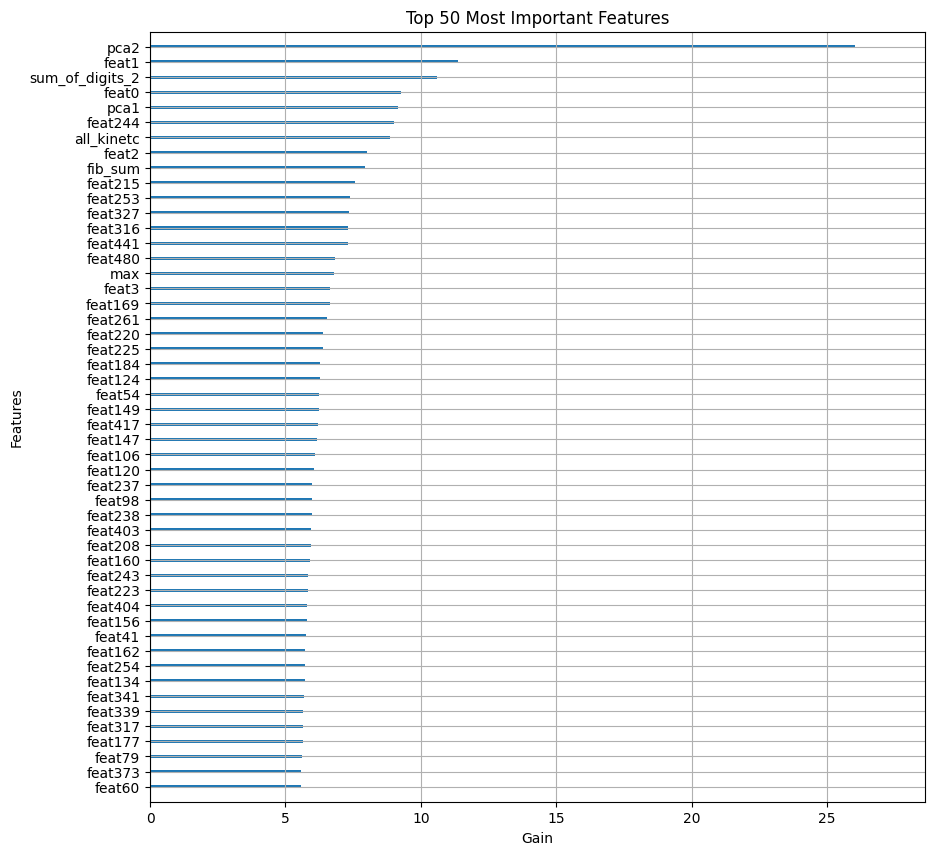

In [119]:
 # Set the number of top features to plot
top_n = 50

# Plot feature importance with feature names
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(model, ax=ax, importance_type='gain',
                    max_num_features=top_n, show_values=False)
plt.yticks(range(top_n))
plt.xlabel('Gain')
plt.title(f'Top {top_n} Most Important Features')
plt.show()

In [239]:
 def fibonacci_number(n):
    if n<=1 :
        return n
    else:
        F=[0] *(n+1)
        F[0]=0
        F[1]=1
        for i in range(2,n+1):
            F[i]=F[i-2]+F[i-1]
        return F[n]

In [240]:
tr.columns

Index(['feat0', 'feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6', 'feat7',
       'feat8', 'feat9',
       ...
       'feat4660', 'feat4661', 'feat4662', 'all_kinetc', 'fib_sum', 'pca1',
       'pca2', 'sum_of_digits', 'sum_of_digits_2', 'max'],
      dtype='object', length=4670)

In [241]:
def fibonacci_last_digit(n):
    if n<=1 :
        return n
    else:
        F=[0] *(n+1)
        F[0]=0
        F[1]=1
        for i in range(2,n+1):
            F[i]=(F[i-2]+F[i-1])%10
        return F[n]

tr['last_digit_fib70'] = tr.apply(lambda x: fibonacci_last_digit(x.pca1.astype(int)),axis=1)



In [120]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
names=tr.columns
tr=scaler.fit_transform(tr)
 

In [121]:
tr=pd.DataFrame(tr,columns=names)
X_train, X_test, y_train, y_test = train_test_split(tr, y, test_size=0.33, random_state=42)
model=xgb.XGBClassifier(n_estimators=11)
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(classification_report(y_test, pred, target_names=target_names))
    

              precision    recall  f1-score   support

    author 0       0.48      0.65      0.55      2587
    author 1       0.44      0.36      0.40      1852
    author 2       0.44      0.30      0.35      2023

    accuracy                           0.46      6462
   macro avg       0.45      0.44      0.43      6462
weighted avg       0.45      0.46      0.45      6462



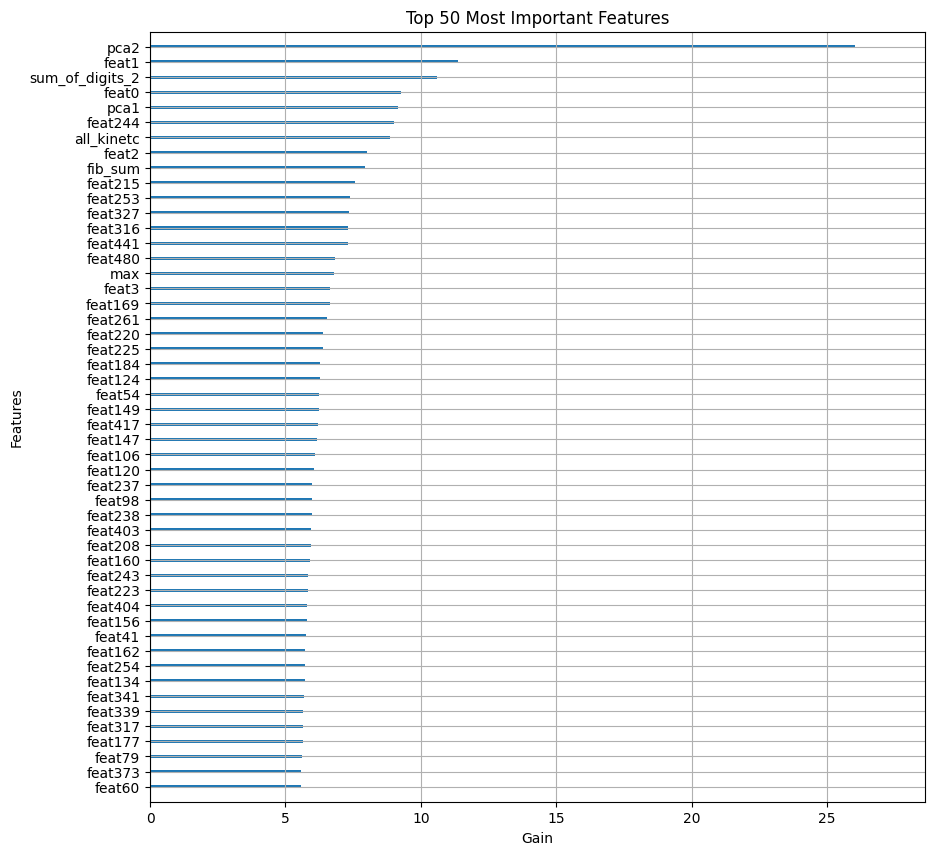

In [122]:
 # Set the number of top features to plot
top_n = 50

# Plot feature importance with feature names
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(model, ax=ax, importance_type='gain',
                    max_num_features=top_n, show_values=False)
plt.yticks(range(top_n))
plt.xlabel('Gain')
plt.title(f'Top {top_n} Most Important Features')
plt.show() 